In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from skimage import data, util, exposure, color

In [2]:
#Para comenzar vamos a mostrar las imágenes, para esto debemos coger el archivo de images y mostrarlo con la librería plot
#Como información extra voy a poner también el formato, tamaño y modo de la imagen.

#He creado esta función para mostrar la información de una determinada imagen y poder verla.
def mostrarInfyImg(file):
    img  = Image.open(file)

    #Información extra
    print('formato:', img.format)
    print('(ancho, alto) =', img.size)
    print('modo: ', img.mode)


    #Valores máximos, mínimos....
    img_np = np.array(img) #convertimos la imagen a un ndarray de Numpy para poder operar con ella
    print('El valor máximo de la imagen: ', img_np.max())
    print('El valor mínimo de la imagen: ', img_np.min())
    print('Mímimo: ', img_np.min(), '\tMáximo: ', img_np.max(), '\tRango: ', img_np.max()-img_np.min())
    print('Media: ', img_np.mean(), '\tDesviación típica: ', img_np.std(), '\tVarianza: ', img_np.var(), 
          '\nCoeficiente de variación', img_np.std()/img_np.mean(), )


    img_q = np.quantile(img, (0.25, 0.5, 0.75))
    print('1er cuantil (Q1): ', img_q[0], '\tMediana (Q2): ', img_q[1], '\t3er cuantil (Q3): ', img_q[2],
         '\nRango intercuantil (IQR): ', img_q[2]-img_q[0], '\tRango medio intercuantil: ', (img_q[0]+img_q[2])/2,
         '\nBigote inferior (Q1 - 1.5 IQR): ', (img_q[0]*1.5)-(img_q[2]-img_q[0]),
         '\nBigote superior (Q3 + 1.5 IQR): ', (img_q[2]*1.5)+(img_q[2]-img_q[0]))


    plt.imshow(img, cmap='gray')# Aquí mostramos la imagen

def mostrarHistograma(file):
    img  = Image.open(file)
    img_np = np.array(img) #convertimos la imagen a un ndarray de Numpy para poder operar con ella
    img_hist, bins = exposure.histogram(img_np, normalize=False)
    plt.plot(bins, img_hist)
    plt.axis([0,255, 0, 1.01*img_hist.max()])
    plt.title('Histograma')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencias absolutas')
    plt.grid()

def mostrarCajaBigote(file):
    img  = Image.open(file)
    img_np = np.array(img) #convertimos la imagen a un ndarray de Numpy para poder operar con ella
    plt.boxplot(img_np.flatten(), vert=False)
    plt.xlim([-1, 256])
    plt.title('Diagrama de dispersión (caja y bigote)')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('imagen')
    plt.grid()
    
def mostrarfunDistribucionCumulativa(file):
    img  = Image.open(file)
    img_np = np.array(img) #convertimos la imagen a un ndarray de Numpy para poder operar con ella
    img_cdf, bins_cdf = exposure.cumulative_distribution(img_np)
    plt.plot(bins_cdf, img_cdf)
    plt.axis([0,255, 0, 1])
    plt.title('Función de distribución cumulativa')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencia relativa acumulada')
    plt.grid()
    

formato: TIFF
(ancho, alto) = (482, 571)
modo:  L
El valor máximo de la imagen:  255
El valor mínimo de la imagen:  21
Mímimo:  21 	Máximo:  255 	Rango:  234
Media:  66.7182565347247 	Desviación típica:  46.500046005779 	Varianza:  2162.254278539563 
Coeficiente de variación 0.6969613479269684
1er cuantil (Q1):  30.0 	Mediana (Q2):  57.0 	3er cuantil (Q3):  82.0 
Rango intercuantil (IQR):  52.0 	Rango medio intercuantil:  56.0 
Bigote inferior (Q1 - 1.5 IQR):  -7.0 
Bigote superior (Q3 + 1.5 IQR):  175.0


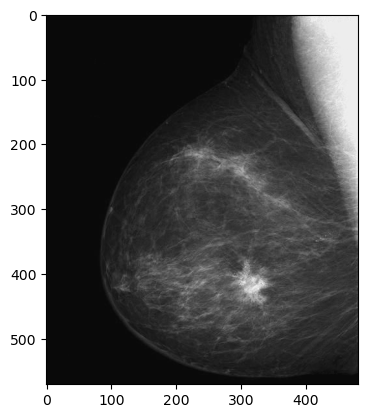

In [3]:
mostrarInfyImg('images/breastXray.tif') #Aquí podemos ver la imagen y toda la inofomación de la imagen de la mamografía.

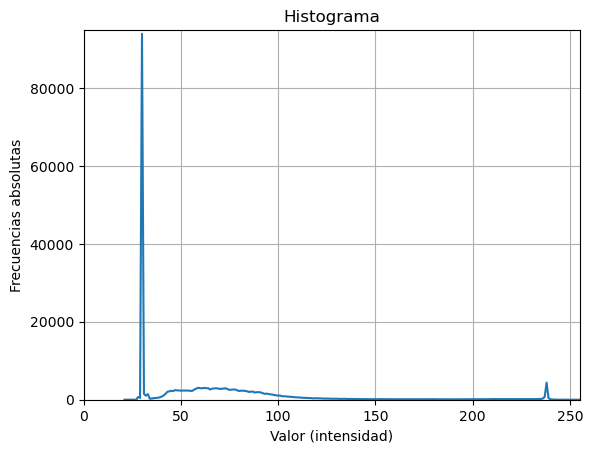

In [4]:
mostrarHistograma('images/breastXray.tif')

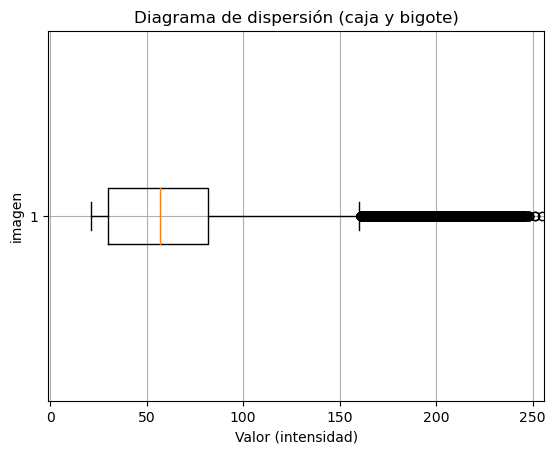

In [5]:
mostrarCajaBigote('images/breastXray.tif')

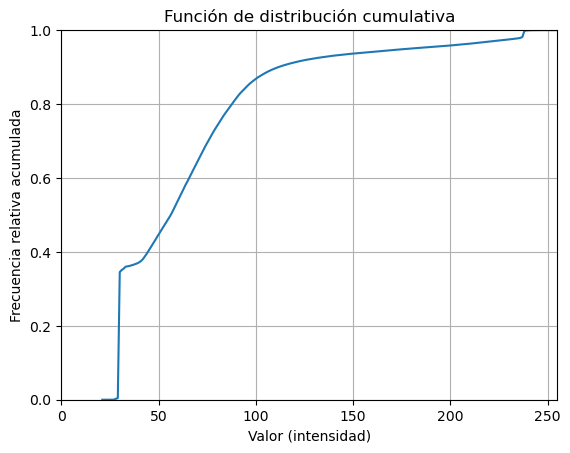

In [6]:
mostrarfunDistribucionCumulativa('images/breastXray.tif')

formato: TIFF
(ancho, alto) = (500, 800)
modo:  L
El valor máximo de la imagen:  255
El valor mínimo de la imagen:  0
Mímimo:  0 	Máximo:  255 	Rango:  255
Media:  17.2210775 	Desviación típica:  29.338301113714703 	Varianza:  860.7359122389935 
Coeficiente de variación 1.7036274944883503
1er cuantil (Q1):  0.0 	Mediana (Q2):  4.0 	3er cuantil (Q3):  22.0 
Rango intercuantil (IQR):  22.0 	Rango medio intercuantil:  11.0 
Bigote inferior (Q1 - 1.5 IQR):  -22.0 
Bigote superior (Q3 + 1.5 IQR):  55.0


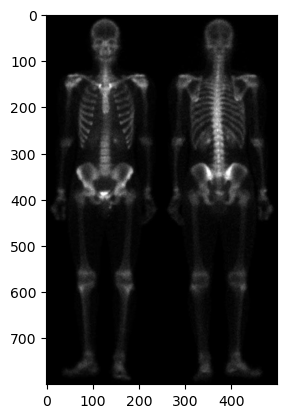

In [7]:
#AHORA TENEMOS QUE HACER LO MISMO CON TODAS LAS DEMÁS IMÁGENES. 
mostrarInfyImg('images/skeleton.tif')

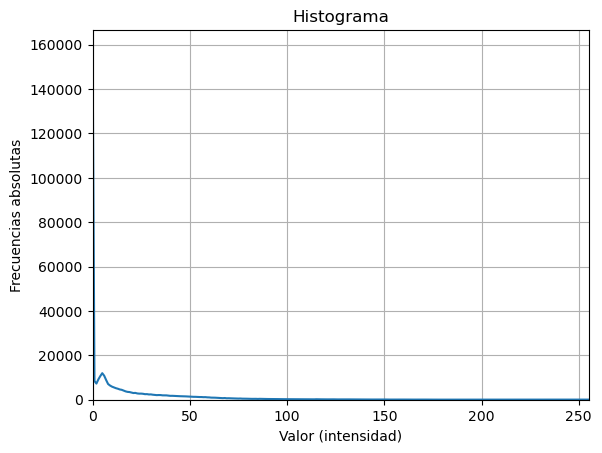

In [8]:
mostrarHistograma('images/skeleton.tif')

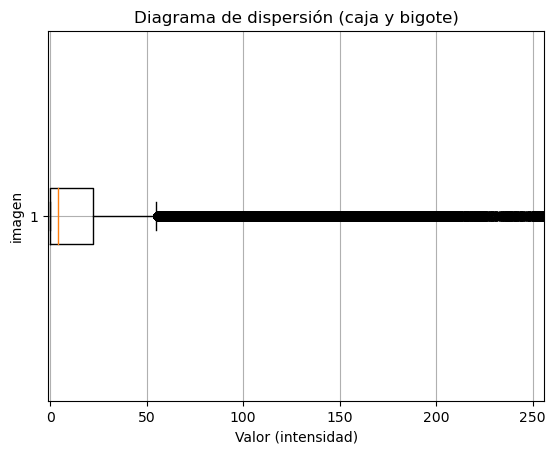

In [9]:
mostrarCajaBigote('images/skeleton.tif')

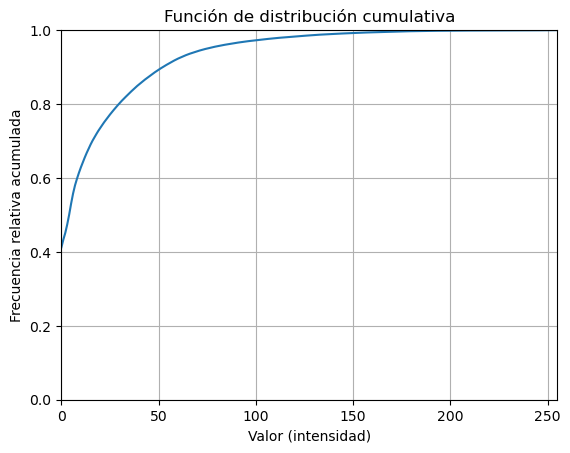

In [10]:
mostrarfunDistribucionCumulativa('images/skeleton.tif')

formato: TIFF
(ancho, alto) = (765, 769)
modo:  L
El valor máximo de la imagen:  255
El valor mínimo de la imagen:  0
Mímimo:  0 	Máximo:  255 	Rango:  255
Media:  197.1243155953322 	Desviación típica:  40.880559425295594 	Varianza:  1671.2201389251243 
Coeficiente de variación 0.20738466130793062
1er cuantil (Q1):  181.0 	Mediana (Q2):  208.0 	3er cuantil (Q3):  222.0 
Rango intercuantil (IQR):  41.0 	Rango medio intercuantil:  201.5 
Bigote inferior (Q1 - 1.5 IQR):  230.5 
Bigote superior (Q3 + 1.5 IQR):  374.0


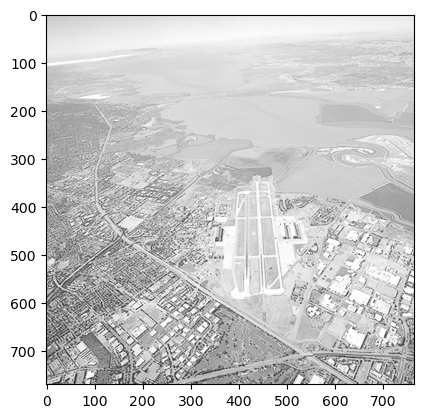

In [11]:
mostrarInfyImg('images/washed_aerial.tif')

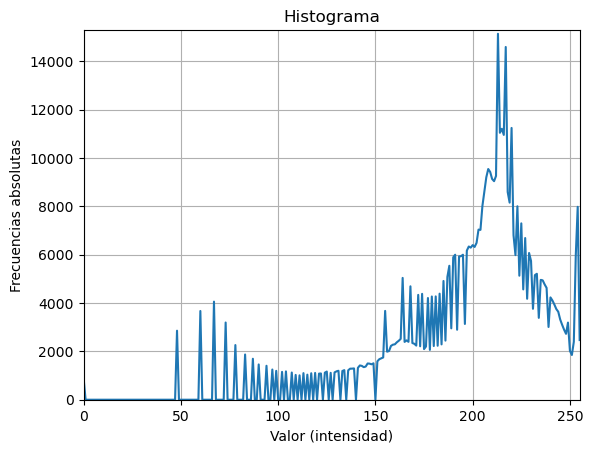

In [12]:
mostrarHistograma('images/washed_aerial.tif')

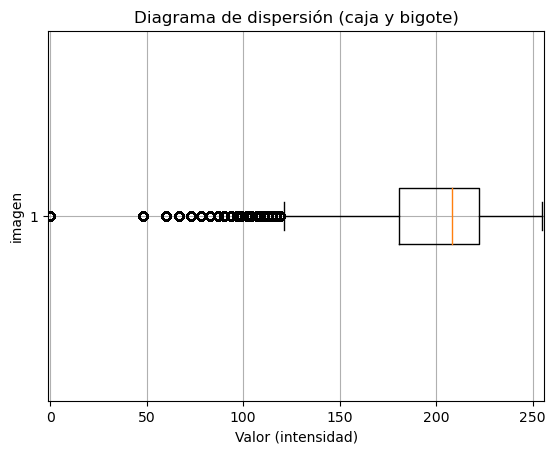

In [13]:
mostrarCajaBigote('images/washed_aerial.tif')

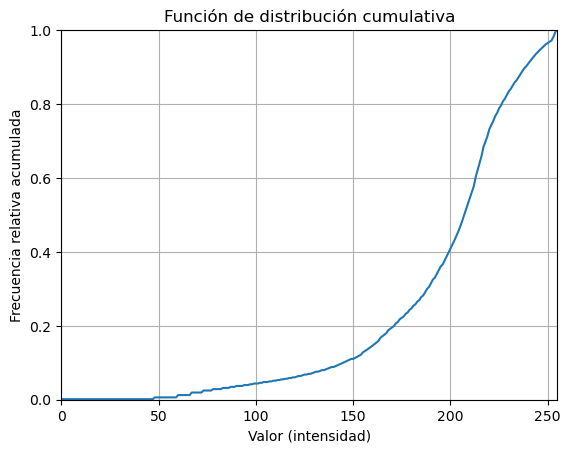

In [14]:
mostrarfunDistribucionCumulativa('images/washed_aerial.tif')

formato: TIFF
(ancho, alto) = (889, 889)
modo:  L
El valor máximo de la imagen:  138
El valor mínimo de la imagen:  91
Mímimo:  91 	Máximo:  138 	Rango:  47
Media:  109.08651168322744 	Desviación típica:  11.49156306034834 	Varianza:  132.05602156996252 
Coeficiente de variación 0.10534357440742348
1er cuantil (Q1):  98.0 	Mediana (Q2):  110.0 	3er cuantil (Q3):  118.0 
Rango intercuantil (IQR):  20.0 	Rango medio intercuantil:  108.0 
Bigote inferior (Q1 - 1.5 IQR):  127.0 
Bigote superior (Q3 + 1.5 IQR):  197.0


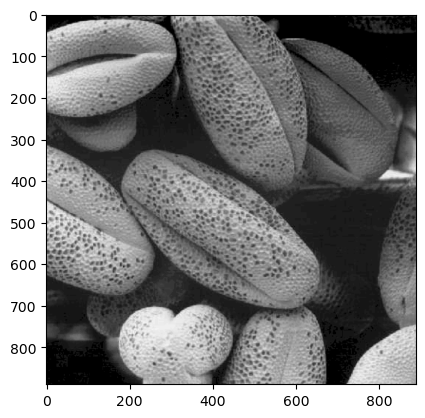

In [15]:
mostrarInfyImg('images/washed_pollen.tif')

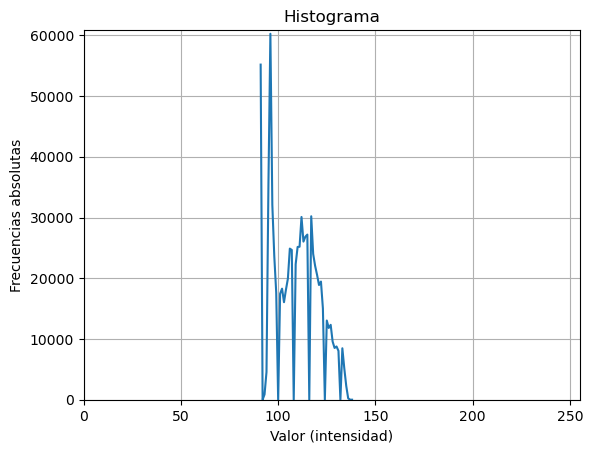

In [16]:
mostrarHistograma('images/washed_pollen.tif')

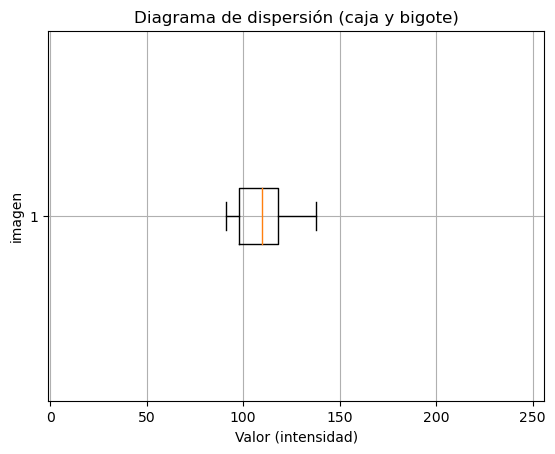

In [17]:
mostrarCajaBigote('images/washed_pollen.tif')

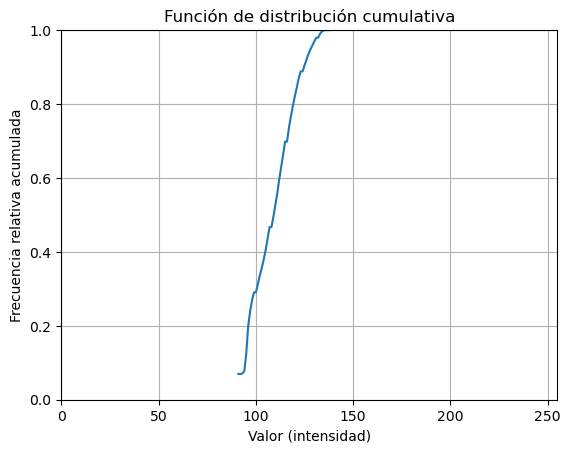

In [18]:
mostrarfunDistribucionCumulativa('images/washed_pollen.tif')

formato: JPEG
(ancho, alto) = (4032, 3024)
modo:  RGB


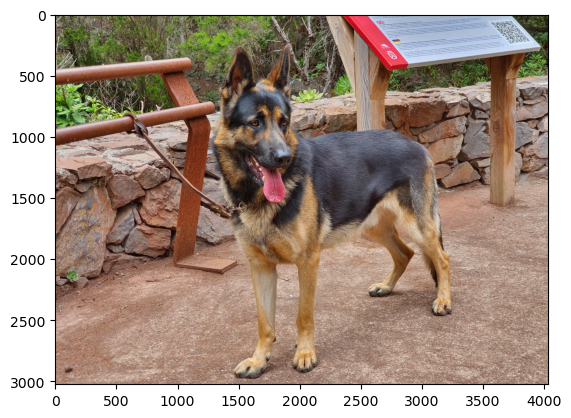

In [19]:
img_RGB = Image.open('images/PerroBoston.jpg')

print('formato:', img_RGB.format)
print('(ancho, alto) =', img_RGB.size)
print('modo: ', img_RGB.mode)


plt.imshow(img_RGB, cmap='gray')

#Cabe destacar que esta imagen es a color, se puede ver fácilmente cuando mostramos el modo (RGB).

Cuando tenemos imágenes en color trabajamos por separado con sus canales componentes. Por ejemplo, podemos trabajar directamente sobre los canales RGB (rojo, verde y azul) o, alternativamente, por ejemplo, hacerlo sobre los canales HSV (tinte, saturación y valor).

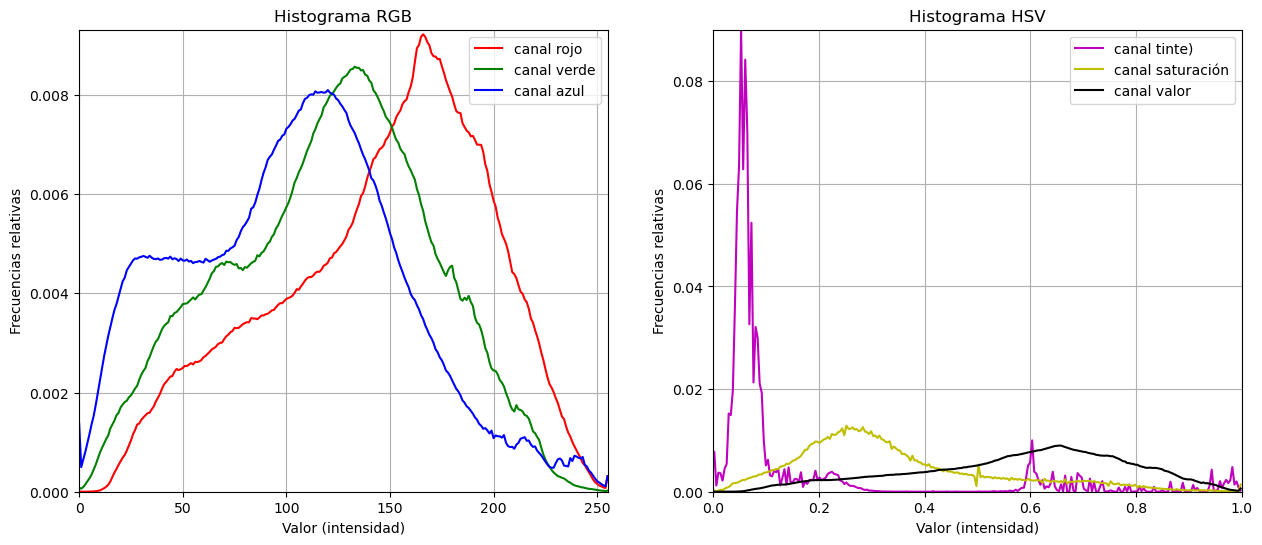

In [20]:
#Ahora vamos a ver el análisis de la imagen en color
#No podemos usar las funciones que hemos usado para las otras imágenes, ya que en esta los histogramas serán bastantes diferentes ya que tenemos 3 canales.
imgRGB_np = np.array(img_RGB)
img_hist, bins = exposure.histogram(imgRGB_np, channel_axis=2, normalize=True)
M = img_hist.max()

plt.figure(figsize=(15, 6)) #Ajustamos para poder ver 2 diagramas a al vez.

#Vamos a mostrar el histograma para el canal RGB
plt.subplot(121)
plt.plot(bins, img_hist[0,:],'r', label='canal rojo')
plt.plot(bins, img_hist[1,:],'g', label='canal verde')
plt.plot(bins, img_hist[2,:],'b', label='canal azul')

plt.axis([0,255, 0, 1.01*img_hist.max()])
plt.legend()
plt.title('Histograma RGB')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()

#Ahora vamos a ver el histograma en HSV, para ello debemos convertirla primero.

plt.subplot(122)
img_hsv = color.rgb2hsv(imgRGB_np)

img_hist, bins = exposure.histogram(img_hsv, channel_axis=2, normalize=True)

plt.plot(bins, img_hist[0,:],'m', label='canal tinte)')
plt.plot(bins, img_hist[1,:],'y', label='canal saturación')
plt.plot(bins, img_hist[2,:],'k', label='canal valor')

plt.axis([0,1, 0, img_hist.max()])
plt.legend()
plt.title('Histograma HSV')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencias relativas')
plt.grid()



Para trabarjar en el espacio HSV debemos realizar algunas modificaciones. La imagen en el espacio HSV no se puede representar directamente (hay que convertirla a RGB) y está en punto flotante, en el rango 0 a 1. Los valores HSV varían del siguiente modo:

- Hue (tinte o color): varía de 0 a 360º, pero se normaliza de 0 a 1. 0ª y 360ª (ó 0) es rojo, 120º (o 1/3) es verde y 240ª (2/3) es azul
- Saturation (saturación): 0 no está saturado (blanco o gris, sin color) y 1 completamente saturado (color puro)
- Value (valor o intensidad percibida -luma-): 0 es mínima luma y 1 es máxima

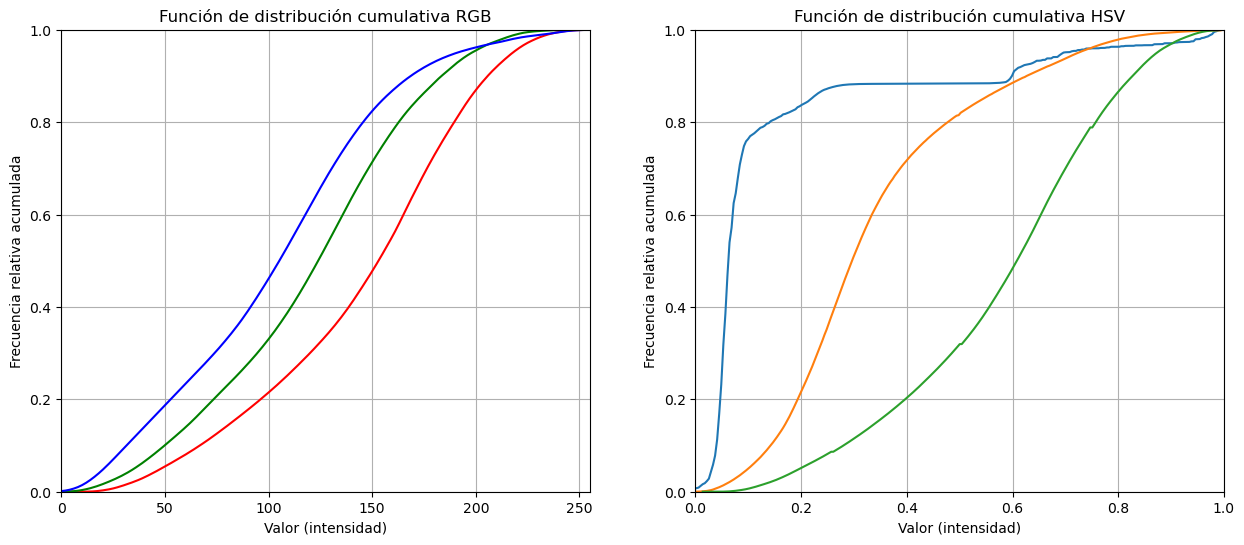

In [21]:
#Ahora vamos a ver la función de distribución cumulativa de RGB
plt.figure(figsize=(15, 6)) #Ajustamos para poder ver 3 diagramas a al vez

img_cdfR, bins_cdfR = exposure.cumulative_distribution(imgRGB_np[:,:,0])
img_cdfG, bins_cdfG = exposure.cumulative_distribution(imgRGB_np[:,:,1])
img_cdfB, bins_cdfB = exposure.cumulative_distribution(imgRGB_np[:,:,2])

plt.subplot(121)
plt.plot(bins_cdfR, img_cdfR, "r")
plt.plot(bins_cdfG, img_cdfG, "g")
plt.plot(bins_cdfB, img_cdfB, "b")
plt.axis([0,255, 0, 1])
plt.title('Función de distribución cumulativa RGB')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencia relativa acumulada')
plt.grid()

#Ahora vamos a ver la función de distribución cumulativa de HSV

img_cdfH, bins_cdfH = exposure.cumulative_distribution(img_hsv[:,:,0])
img_cdfS, bins_cdfS = exposure.cumulative_distribution(img_hsv[:,:,1])
img_cdfV, bins_cdfV = exposure.cumulative_distribution(img_hsv[:,:,2])

plt.subplot(122)
plt.plot(bins_cdfH, img_cdfH)
plt.plot(bins_cdfS, img_cdfS)
plt.plot(bins_cdfV, img_cdfV)
plt.axis([0,1, 0, 1])
plt.title('Función de distribución cumulativa HSV')
plt.xlabel('Valor (intensidad)')
plt.ylabel('Frecuencia relativa acumulada')
plt.grid()



In [22]:
#Mostramos los diagramas caja y bigote (ESTO FALTA, aunque no hace falta)

# A partir de aquí vamos a comenzar con el apartado 3 de la Práctica:

Para realizar la transformación debemos tener en cuenta que: 𝑦=0  fija el nivel de negro ( 𝐵𝐿 ), mientras que  𝑦=𝑀𝑖  (máximo valor posible, por ejemplo, 255) fija el nivel de blanco ( 𝑊𝐿 ) de los píxeles de entrada. Si  𝑥<0  se fija 0 y si  𝑥>𝑀𝑖  se fijan 0 y  𝑀𝑖  para los niveles de negro y blanco, respectivamente.

In [40]:

#Vamos a definir la función para realizar la transformación 
def transformacion (file, Mi, Bl, Wl):
    img = Image.open(file)

    Mi = Mi

    Bl = Bl
    Wl = Wl

    L = (Bl + Wl)/2
    W = Wl - Bl

    m = Mi/W
    b = -Mi*(L/W - 0.5)

    print('Nivel (L): ', L, '\tVentana (W): ', W)
    print('Nivel de negro: ', Bl, '\tNivel de Blanco: ', Wl)
    print('m = ', m, 'b = ', b)
    
    
    img_float = util.img_as_float(img)*Mi

    img_float = img_float*m + b
    img_float[img_float<0]  = 0
    img_float[img_float>Mi] = Mi

    img_transf = util.img_as_ubyte(img_float/Mi)

    print('Tipo de datos: ', img_transf.dtype)
    print('Tamaño de imagen (filas, columnas): ', img_transf.shape)
    print('Número de píxels: ', img_transf.size)
    print('Imagen: \nValor mínimo: ', img_transf.min(), '\tValor máximo: ', img_transf.max())
    print('Valor mediano: ', img_transf.mean())
        
    
    
    plt.figure(figsize=(15, 6))
    
    
    img_hist, bins = exposure.histogram(img_transf, normalize=True)

    plt.subplot(121)
    plt.imshow(img_transf, cmap='gray')
    plt.title('Imagen transformada')

    plt.subplot(122)
    plt.plot(bins, img_hist)
    plt.axis([0,255, 0, img_hist.max()])
    plt.title('Histograma')
    plt.xlabel('Valor (intensidad)')
    plt.ylabel('Frecuencias relativas')
    plt.grid()

    plt.tight_layout()

Hemos utilizado la función de **scikit-image.util** para hacer la conversión, por lo que tendremos que tener en cuenta el reescalado.

Nivel (L):  94.5 	Ventana (W):  69
Nivel de negro:  60 	Nivel de Blanco:  129
m =  3.6956521739130435 b =  -221.73913043478262
Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (571, 482)
Número de píxels:  275222
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  51.41865112527341


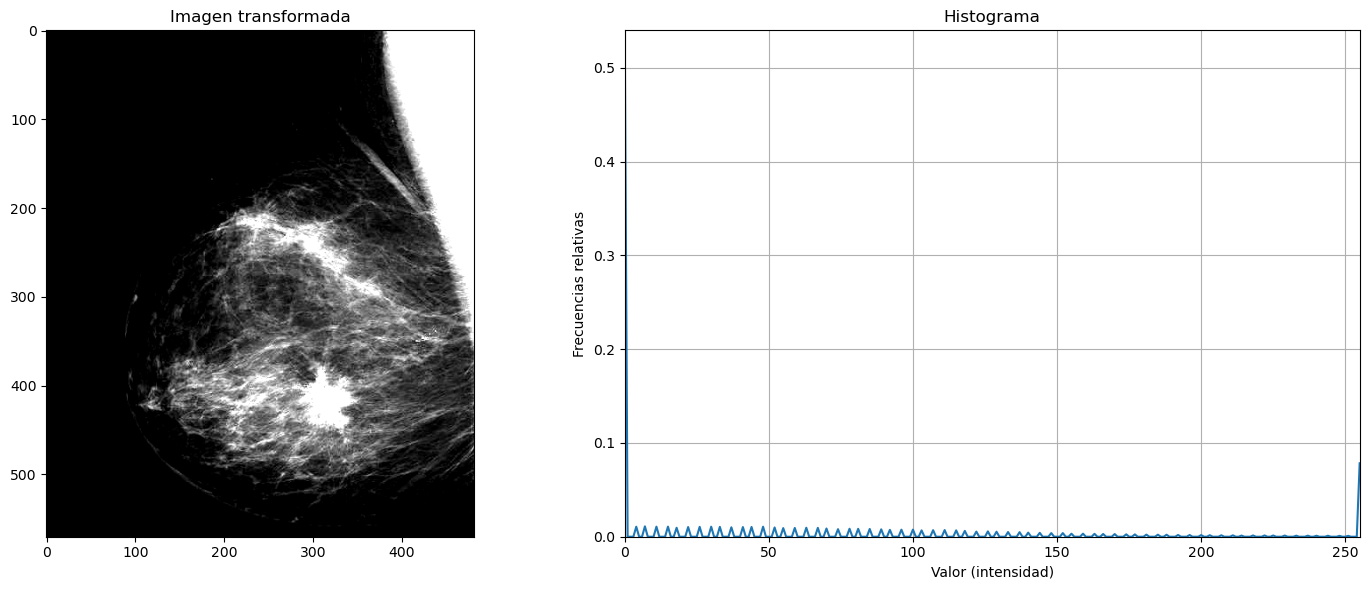

In [42]:
#Vamos a comenzar con la primera imagen, usando la función que hemos definido anteriormente donde por parámetros metemos:
# (file, Mi, Bl, Wl)


transformacion('images/breastXray.tif', 255, 60, 129)

Nivel (L):  74.5 	Ventana (W):  109
Nivel de negro:  20 	Nivel de Blanco:  129
m =  2.3394495412844036 b =  -46.788990825688074
Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (800, 500)
Número de píxels:  400000
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  20.4210925


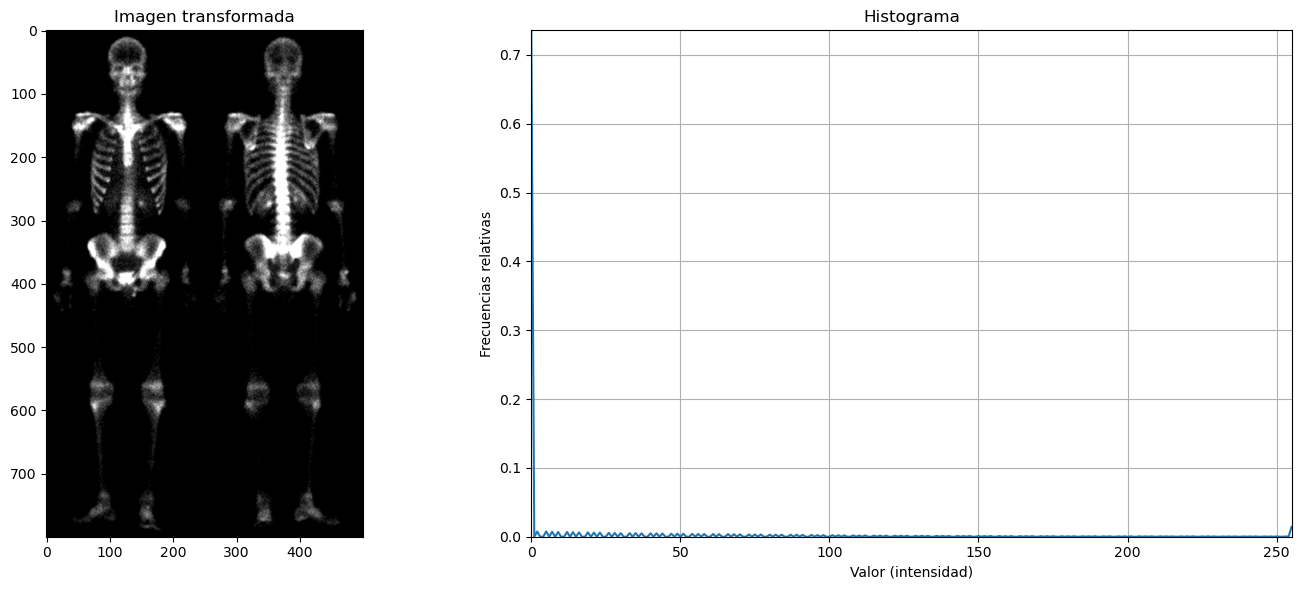

In [54]:
transformacion('images/skeleton.tif', 255, 20, 129)

Nivel (L):  114.5 	Ventana (W):  29
Nivel de negro:  100 	Nivel de Blanco:  129
m =  6.896551724137931 b =  -689.655172413793
Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (769, 765)
Número de píxels:  588285
Imagen: 
Valor mínimo:  0 	Valor máximo:  255
Valor mediano:  227.95176317601164


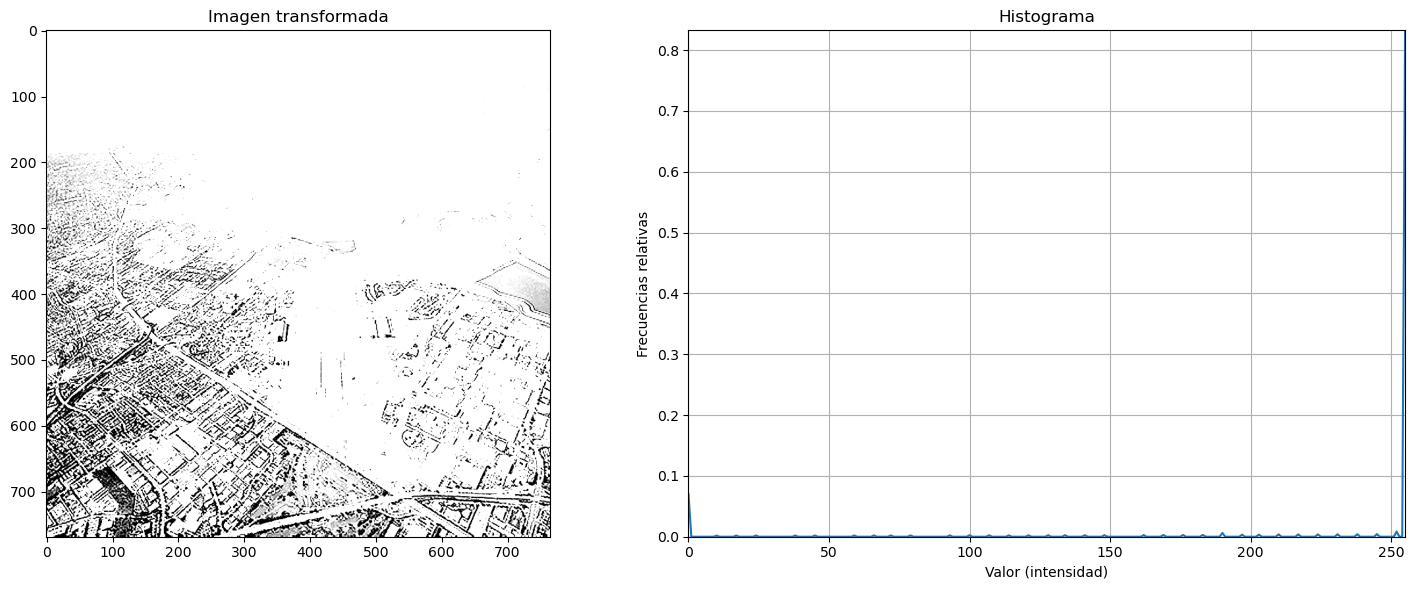

In [56]:
transformacion('images/washed_aerial.tif', 200, 100, 129)